In [1]:
import sys  
sys.path.insert(0, 'C:\\Users\\forka\\PycharmProjects\\araneae')

In [2]:
import matplotlib.pyplot as plt

In [3]:
from utils.spider_connectors import *
from spider_analysis.db.tables_sizes import *

In [4]:
en_spider = EnSpiderDB()
ru_spider_old = RuSpiderDBOld()
ru_spider_new = RuSpiderDB()

### Проверяем, что таблицы совпадают

In [5]:
en_dbs = set(en_spider.extract_dbs())
ru_old_dbs = set(ru_spider_old.extract_dbs())
ru_new_dbs = set(ru_spider_new.extract_dbs())

In [6]:
en_dbs == ru_old_dbs

True

In [7]:
ru_old_dbs == ru_new_dbs

True

### Изучаем размеры таблиц

Английская:

In [5]:
en_all_table_sizes, en_unique_table_sizes = get_tables_sizes_statistics(en_spider)
x_values = en_all_table_sizes.get_x()
y_values = en_all_table_sizes.get_y()

In [6]:
print(x_values[7])
print(y_values[7])

7
191


### Отображение по 25 значений

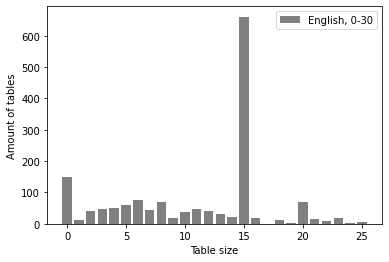

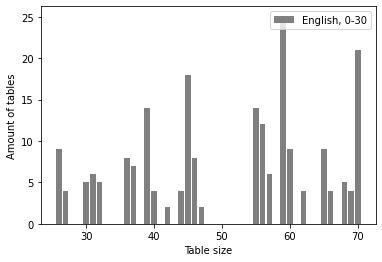

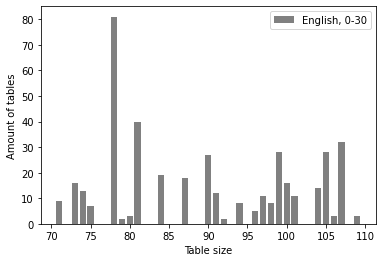

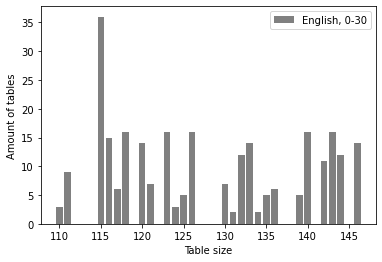

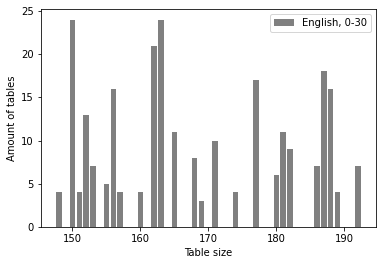

In [77]:
step = 25
for k in range(5):
    left = k * step
    right = (k + 1) * 25
    plt.bar(x_values[left:right], y_values[left:right], label='English, 0-30', color="grey", width=0.8)
    plt.legend(loc='upper right')
    plt.xlabel("Table size")
    plt.ylabel("Amount of tables")
    plt.show()

In [64]:
print(y_values[0])
print(len(x_values))
print(max(y_values))
print(x_values[y_values.index(max(y_values))])
print(max(x_values))

122
1081
15
510437


In [69]:
print(en_all_table_sizes.content[0])

NumericalItem(key=0, value=268)


In [ ]:
max(y_values)

### Отображение по масштабу

In [81]:
x_values = en_all_table_sizes.get_x()
y_values = en_all_table_sizes.get_y()

In [11]:
boundaries = []
deltas = []
k = 4.0
last_right = 0
for i, x in enumerate(x_values):
    if i > 0:
        diff = x - x_values[i - 1]
        deltas.append(diff)
    if len(deltas) > 1 and deltas[-1] / deltas[-2] >= k or (i - last_right > 25):
        boundaries.append((last_right, i))
        last_right = i
print(len(boundaries))
print(boundaries)

53
[(0, 26), (26, 52), (52, 78), (78, 98), (98, 115), (115, 121), (121, 123), (123, 144), (144, 148), (148, 163), (163, 167), (167, 171), (171, 186), (186, 198), (198, 205), (205, 211), (211, 224), (224, 226), (226, 228), (228, 231), (231, 234), (234, 238), (238, 241), (241, 243), (243, 247), (247, 251), (251, 259), (259, 262), (262, 268), (268, 274), (274, 284), (284, 288), (288, 290), (290, 293), (293, 294), (294, 296), (296, 303), (303, 306), (306, 312), (312, 320), (320, 324), (324, 325), (325, 327), (327, 334), (334, 335), (335, 337), (337, 339), (339, 340), (340, 343), (343, 344), (344, 347), (347, 349), (349, 352)]


In [91]:
boundaries[0] = (0, 26)
boundaries[1] = (26, 44)
print(boundaries)

[(0, 26), (26, 44), (44, 48), (48, 54), (54, 58), (58, 61), (61, 67), (67, 71), (71, 75), (75, 78), (78, 88), (88, 91), (91, 94), (94, 99), (99, 102), (102, 106), (106, 108), (108, 115), (115, 119), (119, 121)]


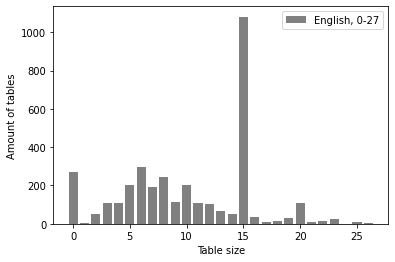

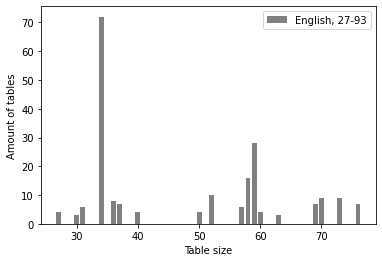

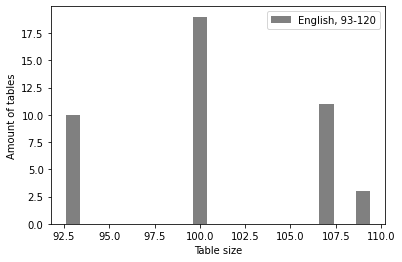

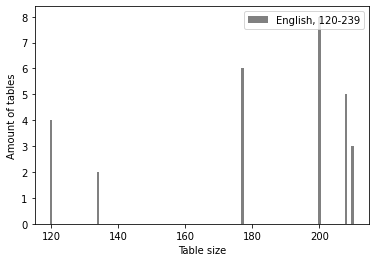

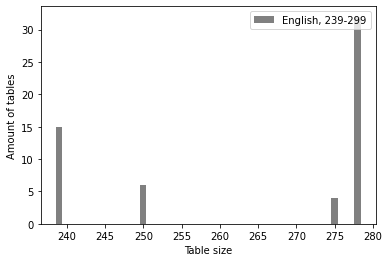

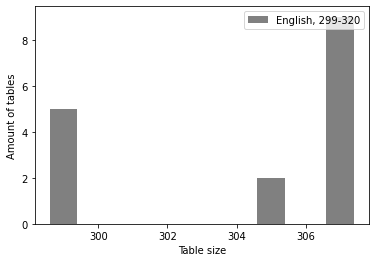

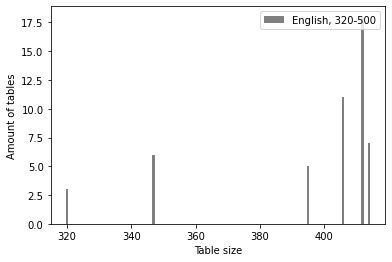

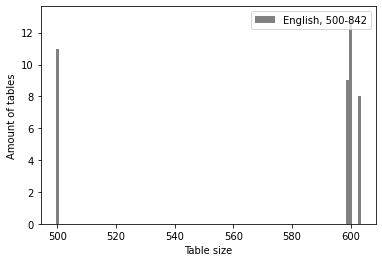

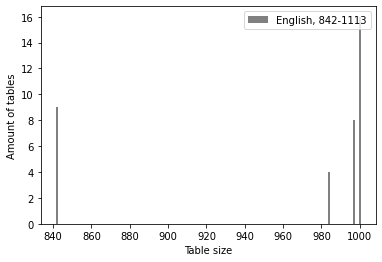

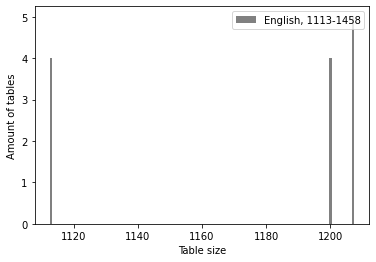

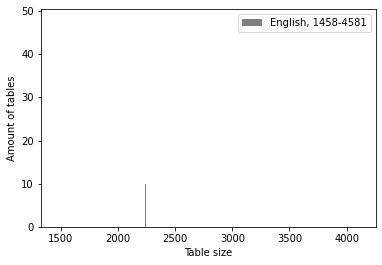

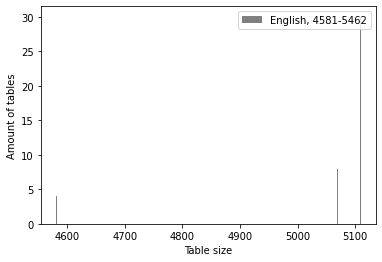

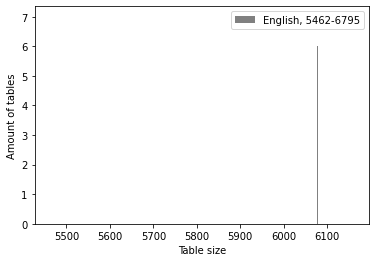

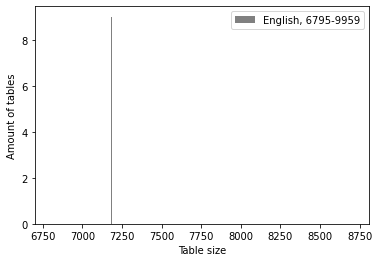

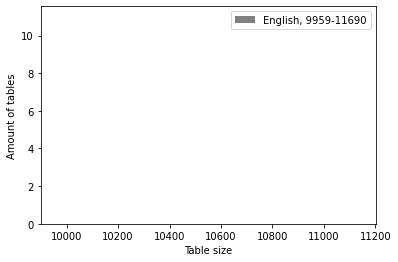

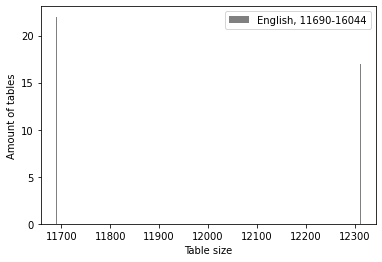

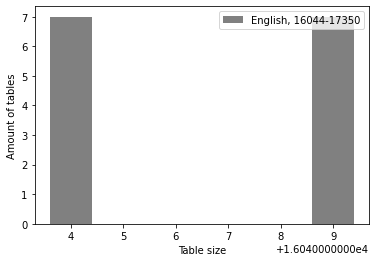

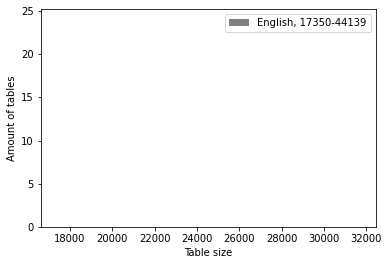

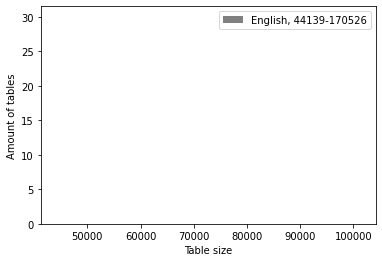

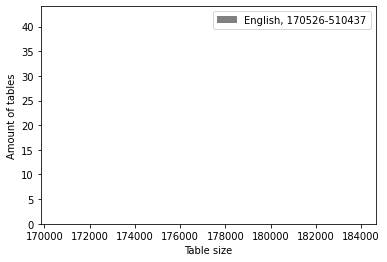

In [62]:
for left, right in boundaries:
    plt.bar(x_values[left:right], y_values[left:right], label=f'English, {x_values[left]}-{x_values[right]}', color="grey", width=0.8)
    plt.legend(loc='upper right')
    plt.xlabel("Table size")
    plt.ylabel("Amount of tables")
    plt.show()

Russian-old

In [66]:
# Очень долго!
ruold_all_table_sizes, ruold_unique_table_sizes = get_tables_sizes_statistics(ru_spider_old)
x_values = ruold_all_table_sizes.get_x()
y_values = ruold_all_table_sizes.get_y()

In [70]:
print(y_values[0])
print(len(x_values))
print(max(y_values))
print(x_values[y_values.index(max(y_values))])
print(max(x_values))

150
313
661
15
16844421


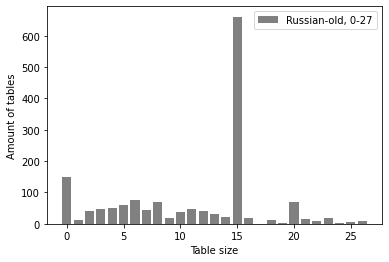

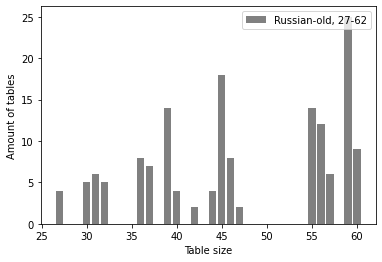

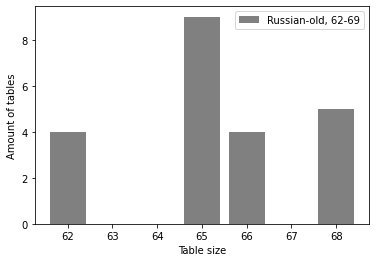

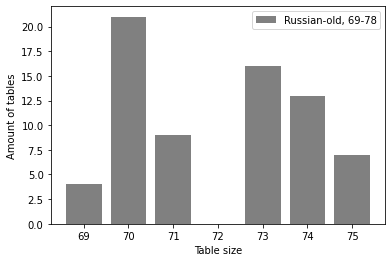

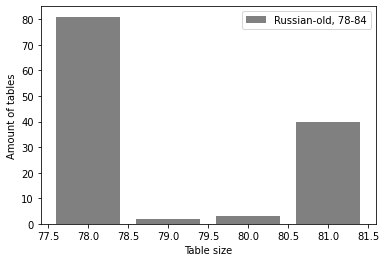

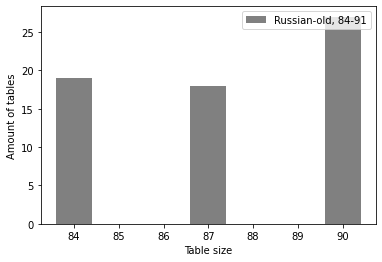

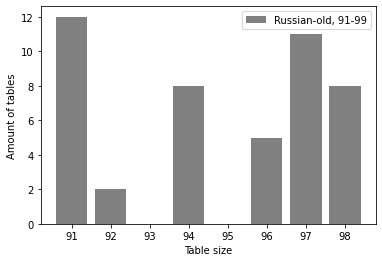

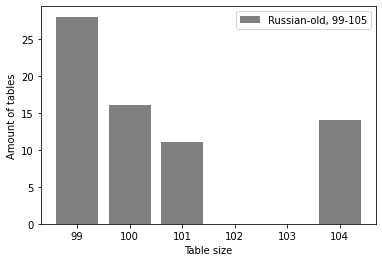

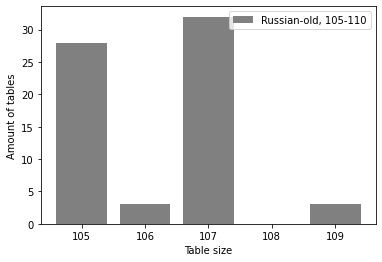

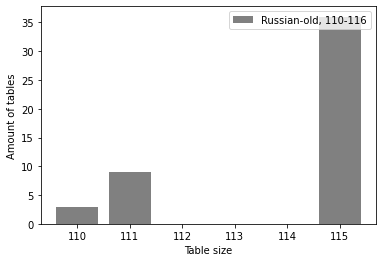

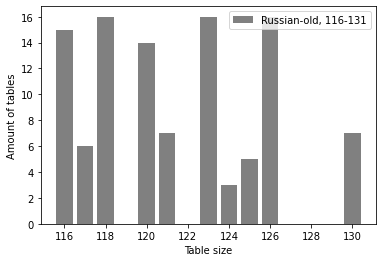

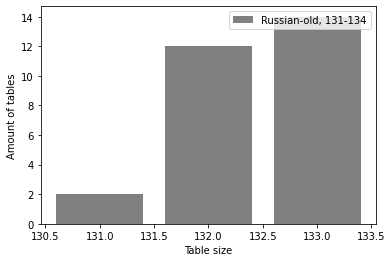

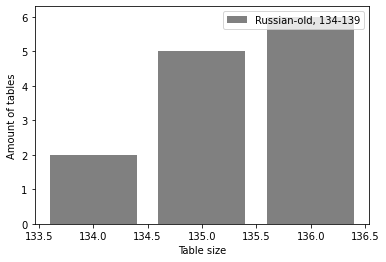

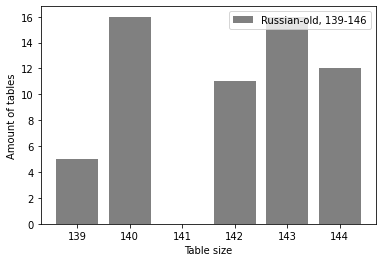

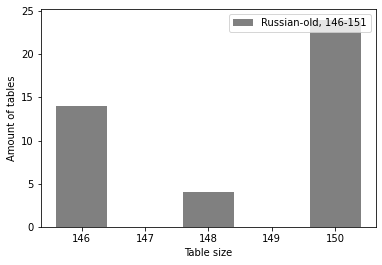

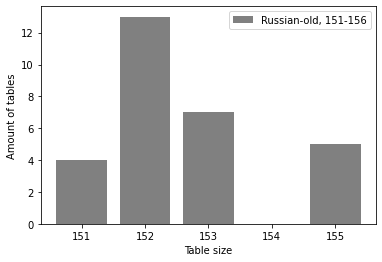

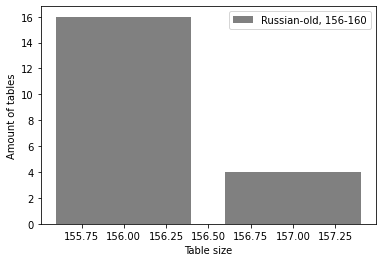

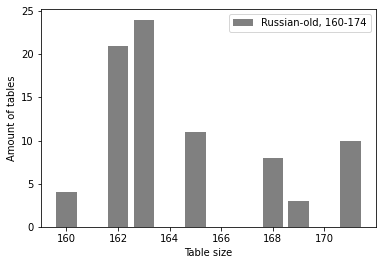

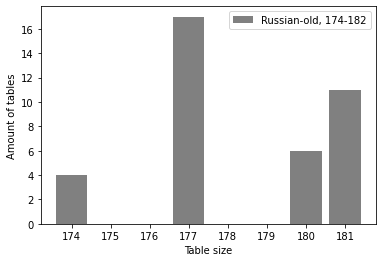

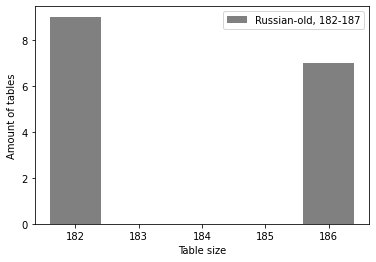

In [74]:
for left, right in boundaries:
    plt.bar(x_values[left:right], y_values[left:right], label=f'Russian-old, {x_values[left]}-{x_values[right]}', color="grey", width=0.8)
    plt.legend(loc='upper right')
    plt.xlabel("Table size")
    plt.ylabel("Amount of tables")
    plt.show()

Russian-new

In [7]:
# Очень долго!
runew_all_table_sizes, runew_unique_table_sizes = get_tables_sizes_statistics(ru_spider_new)
x_values = runew_all_table_sizes.get_x()
y_values = runew_all_table_sizes.get_y()

In [8]:
print(x_values[15])
print(y_values[15])

15
427


In [93]:
x_values = runew_all_table_sizes.get_x()
y_values = runew_all_table_sizes.get_y()

In [9]:
print(y_values[0])
print(len(x_values))
print(max(y_values))
print(x_values[y_values.index(max(y_values))])
print(max(x_values))

3
145
427
15
510437


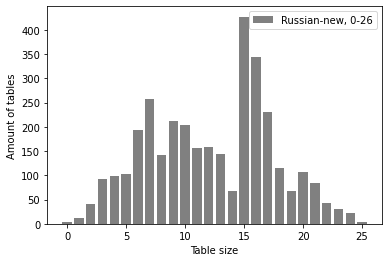

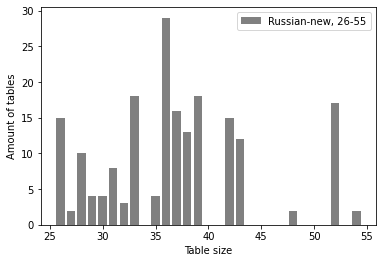

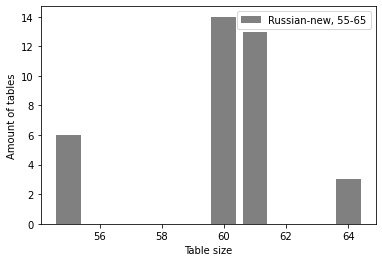

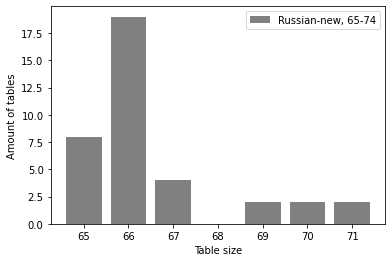

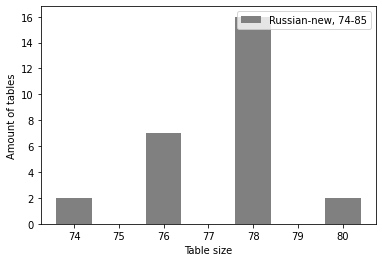

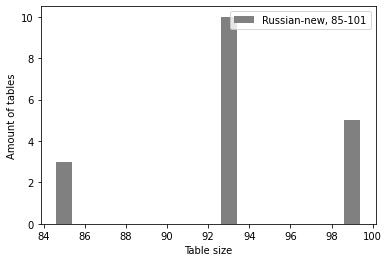

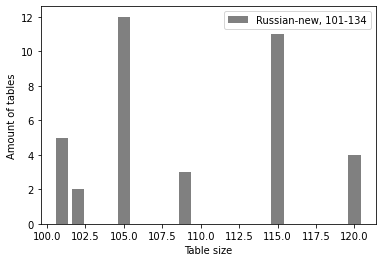

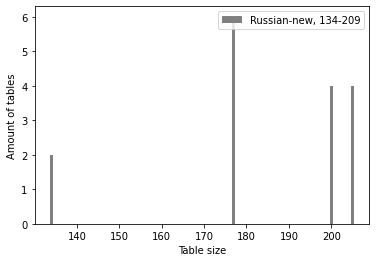

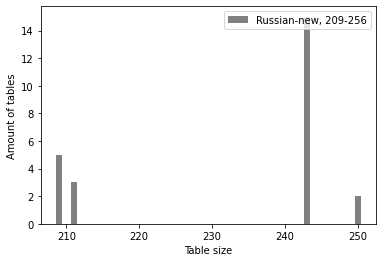

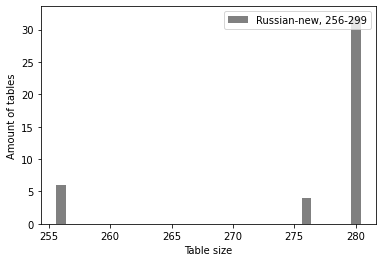

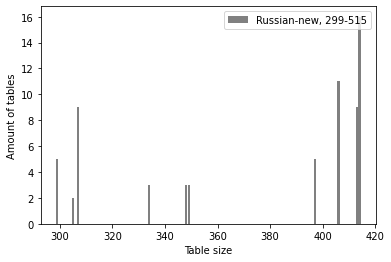

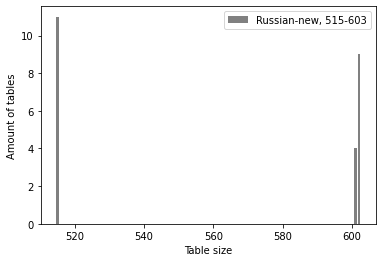

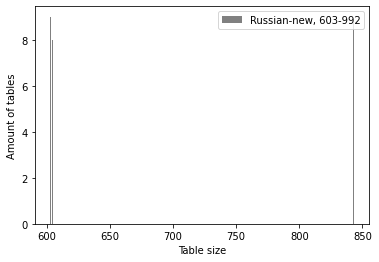

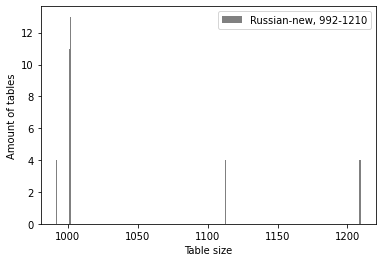

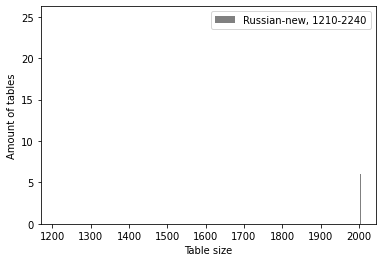

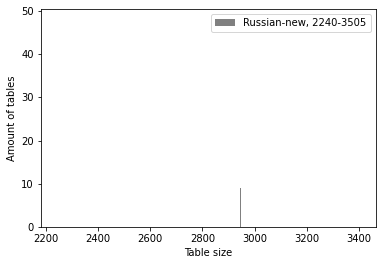

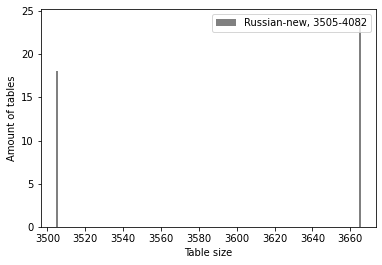

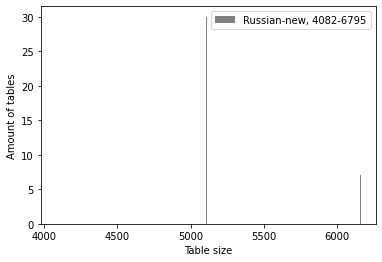

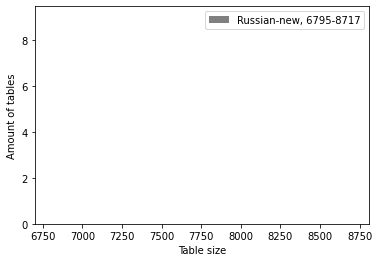

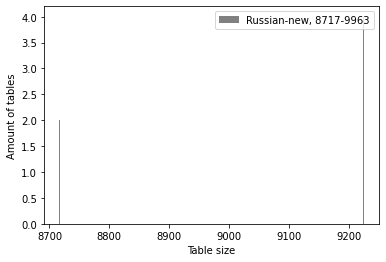

In [95]:

for left, right in boundaries:
    plt.bar(x_values[left:right], y_values[left:right], label=f'Russian-new, {x_values[left]}-{x_values[right]}', color="grey", width=0.8)
    plt.legend(loc='upper right')
    plt.xlabel("Table size")
    plt.ylabel("Amount of tables")
    plt.show()

### Unique values

7
202
3
319
268
354
553
15
183978


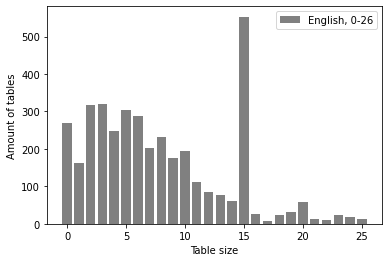

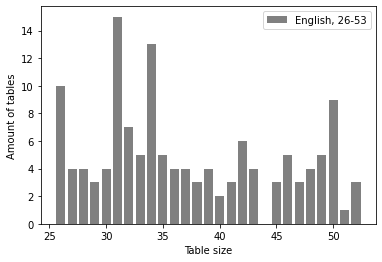

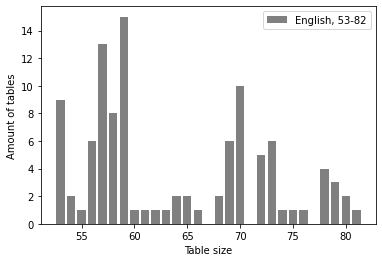

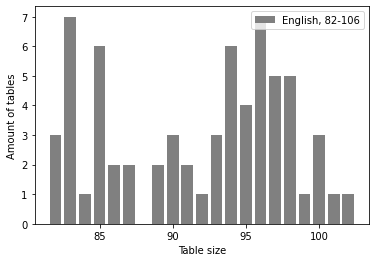

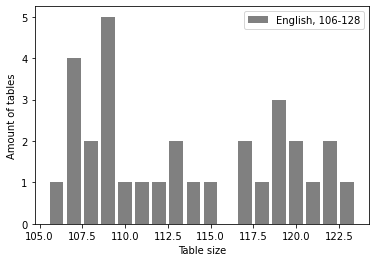

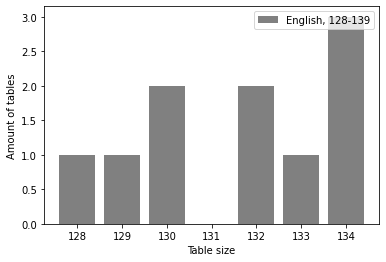

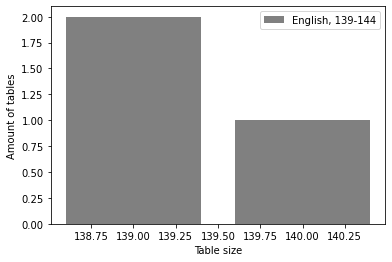

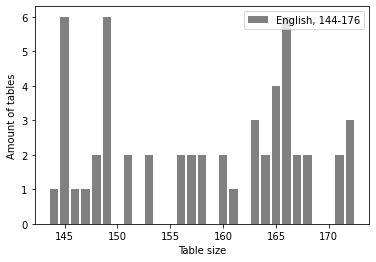

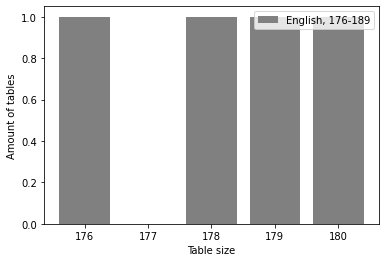

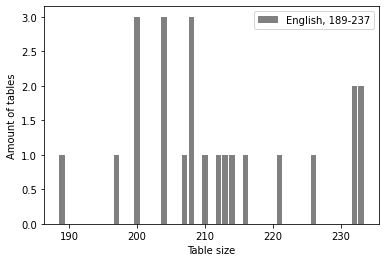

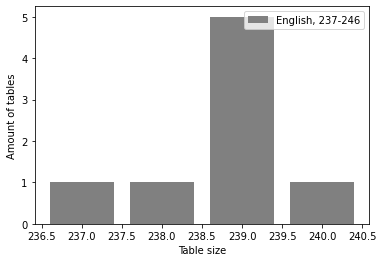

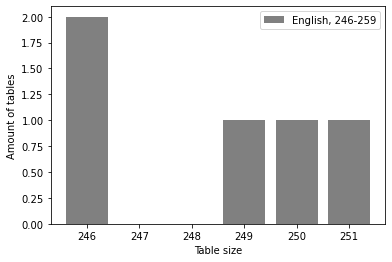

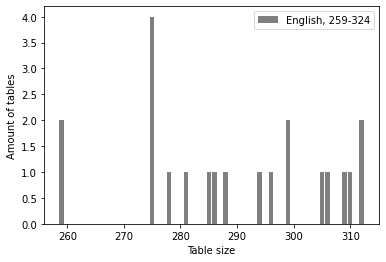

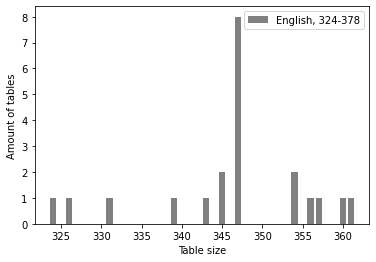

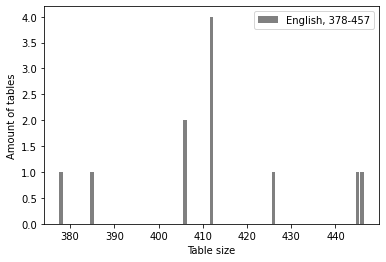

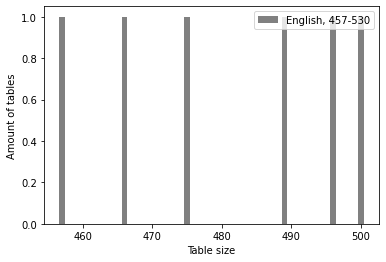

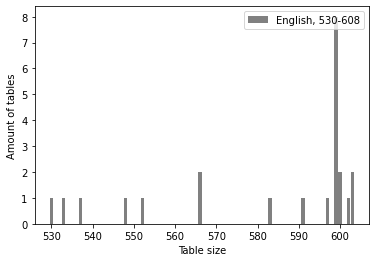

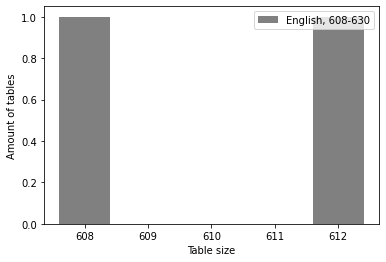

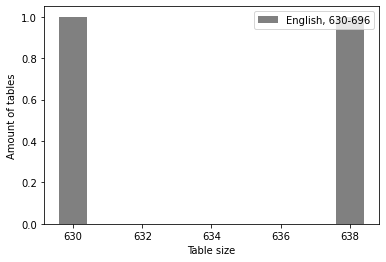

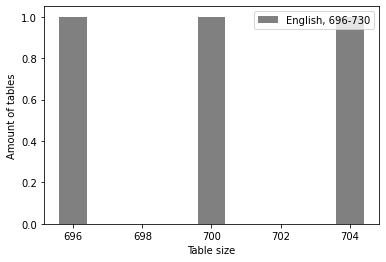

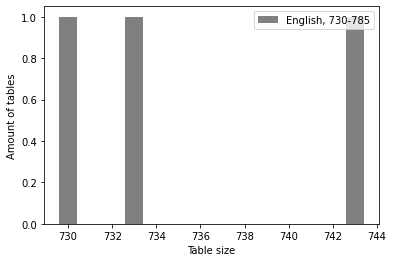

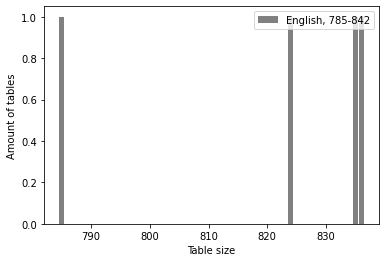

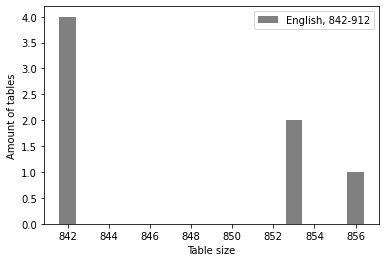

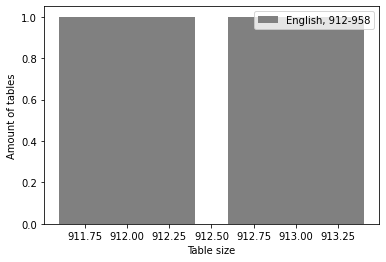

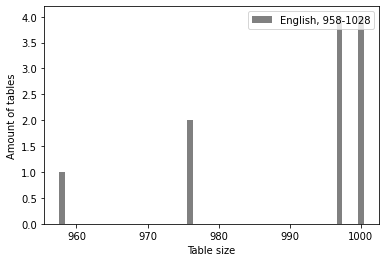

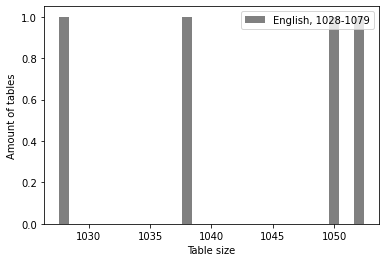

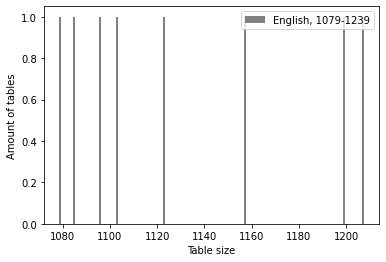

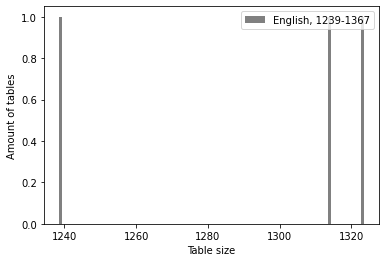

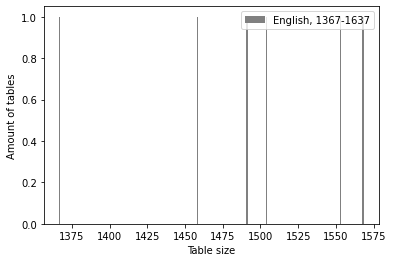

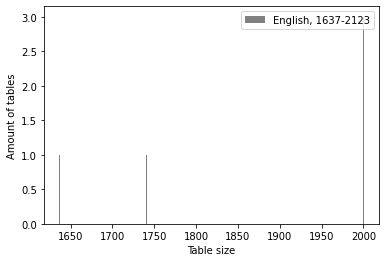

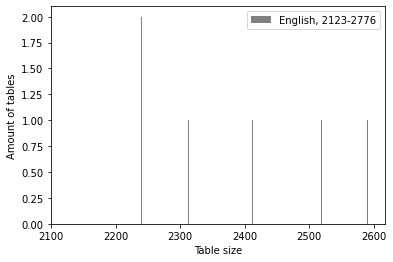

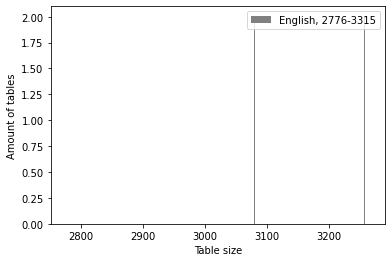

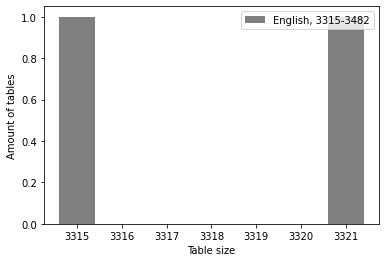

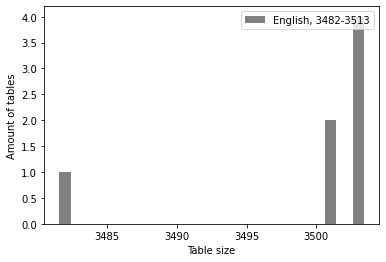

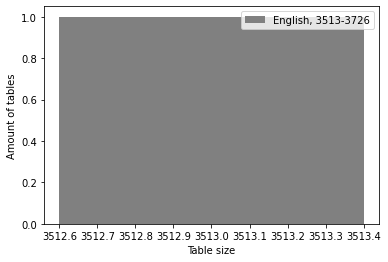

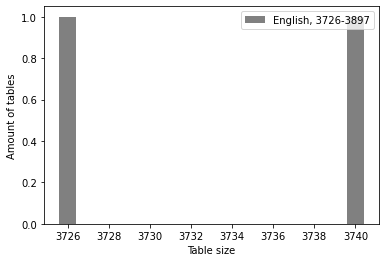

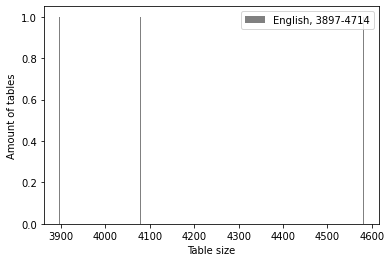

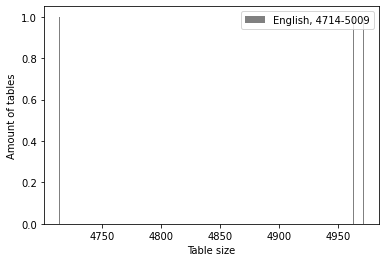

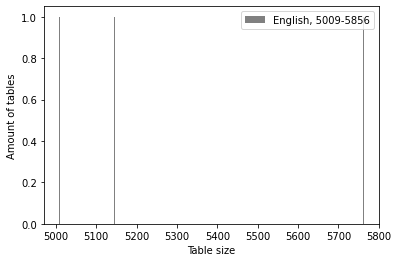

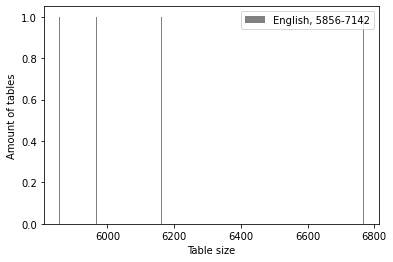

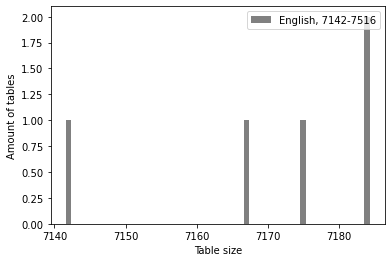

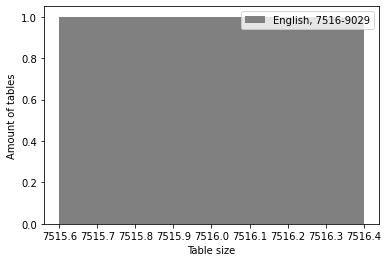

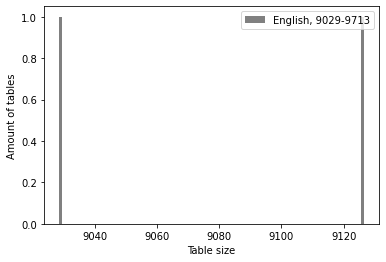

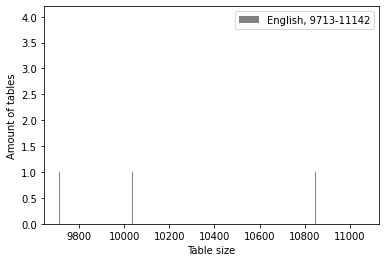

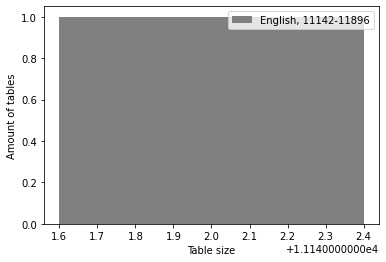

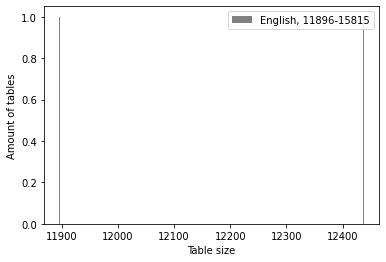

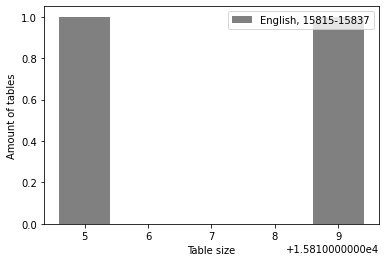

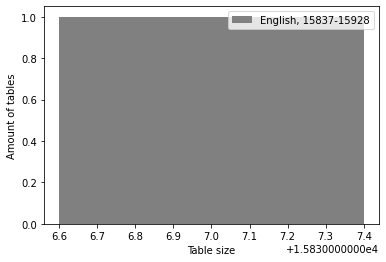

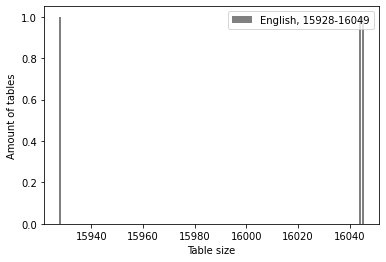

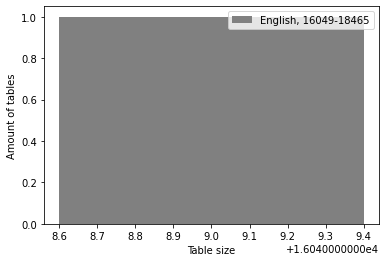

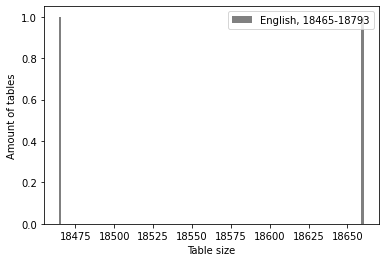

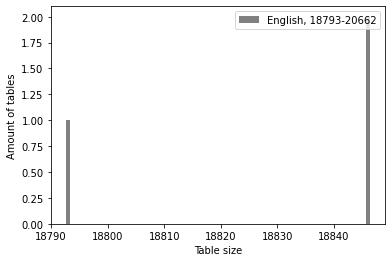

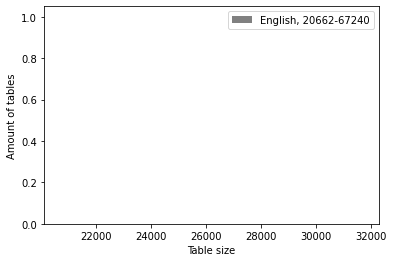

In [15]:
x_values = en_unique_table_sizes.get_x()
y_values = en_unique_table_sizes.get_y()

print(x_values[7])
print(y_values[7])

print(x_values[3])
print(y_values[3])

print(y_values[0])
print(len(x_values))
print(max(y_values))
print(x_values[y_values.index(max(y_values))])
print(max(x_values))

for left, right in boundaries:
    plt.bar(x_values[left:right], y_values[left:right], label=f'English, {x_values[left]}-{x_values[right]}', color="grey", width=0.8)
    plt.legend(loc='upper right')
    plt.xlabel("Table size")
    plt.ylabel("Amount of tables")
    plt.show()

150
420
372
15
2575698


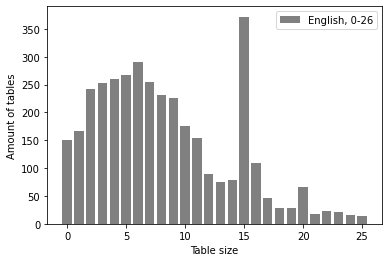

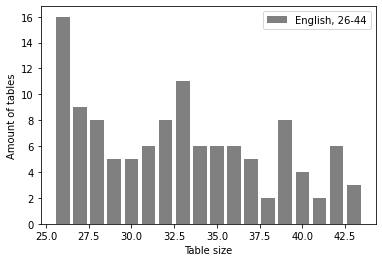

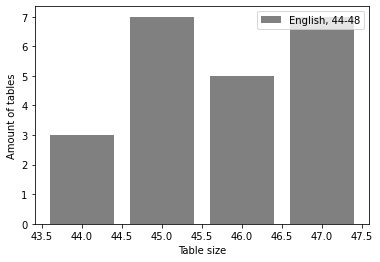

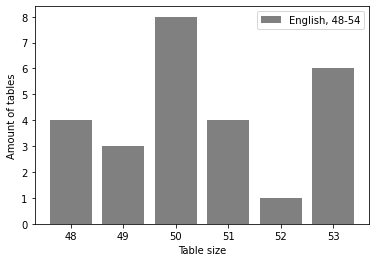

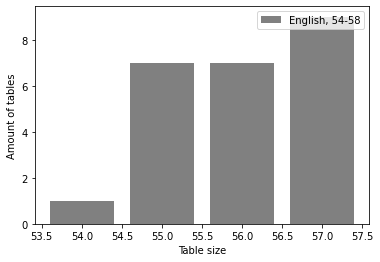

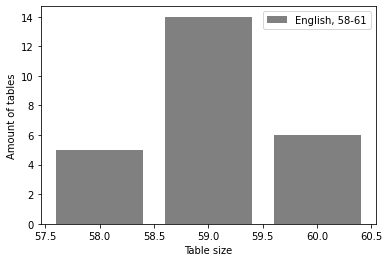

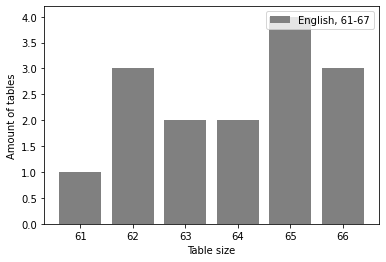

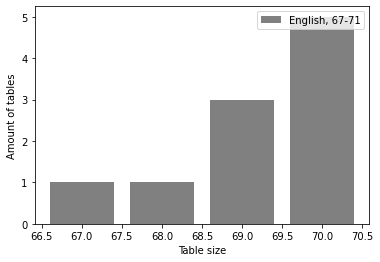

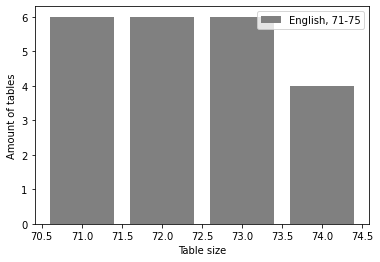

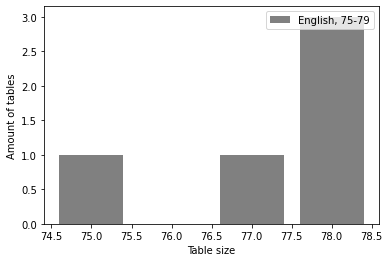

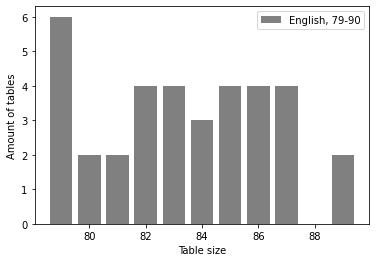

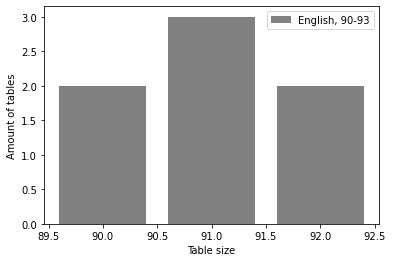

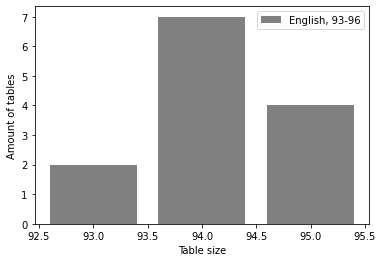

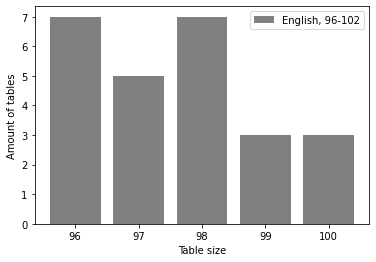

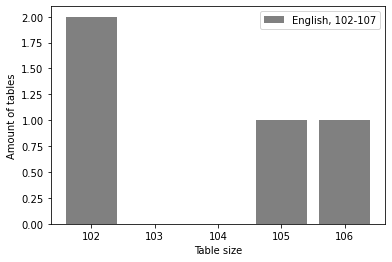

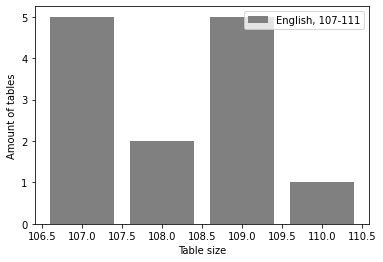

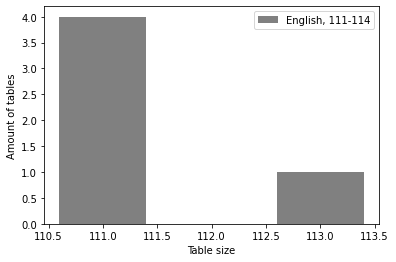

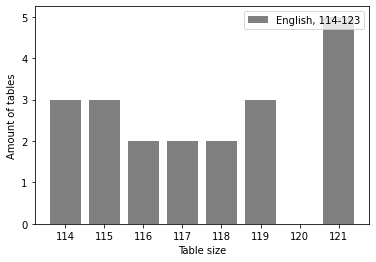

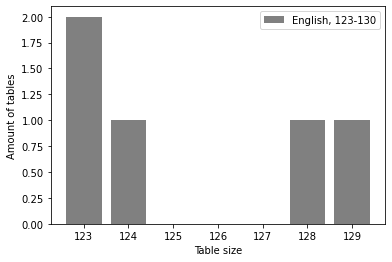

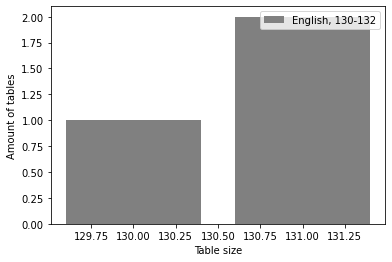

In [98]:
x_values = ruold_unique_table_sizes.get_x()
y_values = ruold_unique_table_sizes.get_y()

print(y_values[0])
print(len(x_values))
print(max(y_values))
print(x_values[y_values.index(max(y_values))])
print(max(x_values))

for left, right in boundaries:
    plt.bar(x_values[left:right], y_values[left:right], label=f'English, {x_values[left]}-{x_values[right]}', color="grey", width=0.8)
    plt.legend(loc='upper right')
    plt.xlabel("Table size")
    plt.ylabel("Amount of tables")
    plt.show()

15
275
3
294
3
373
302
7
183978


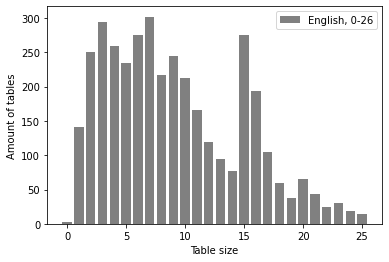

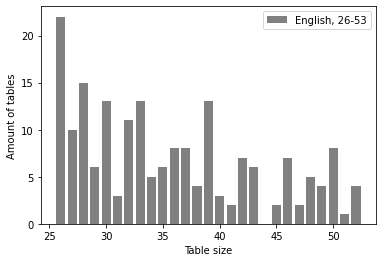

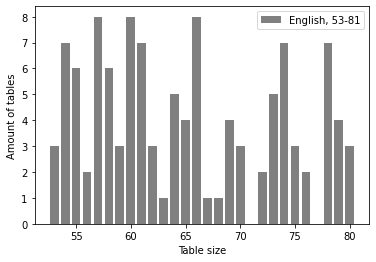

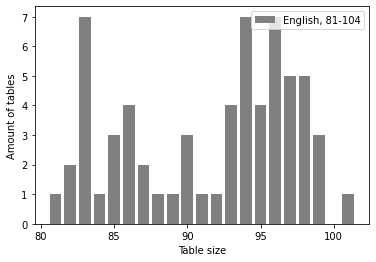

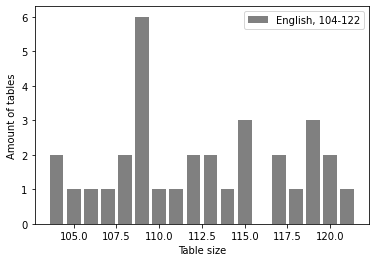

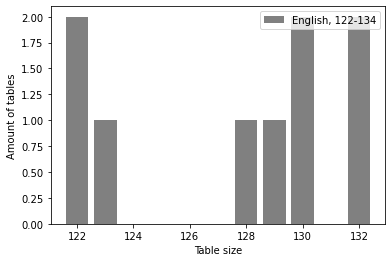

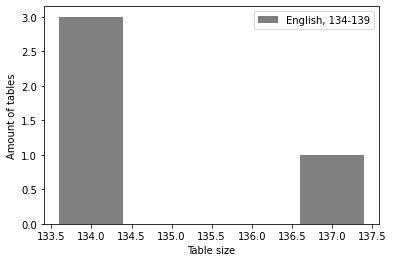

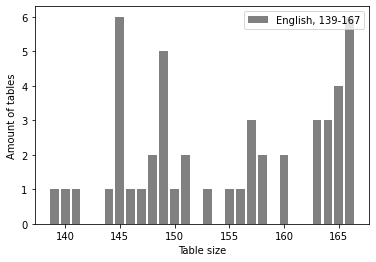

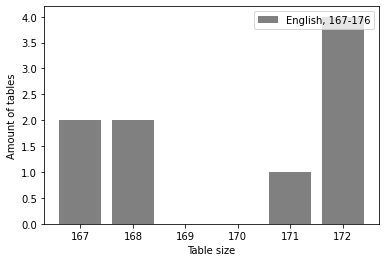

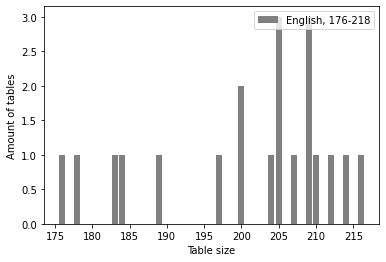

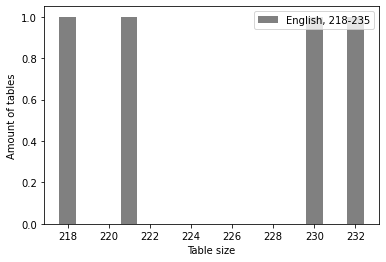

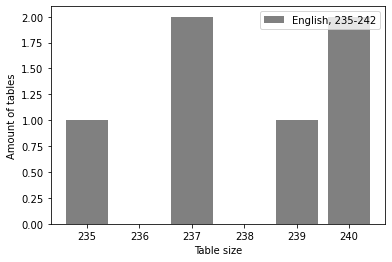

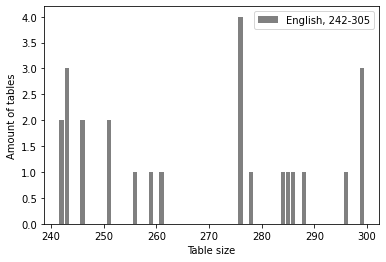

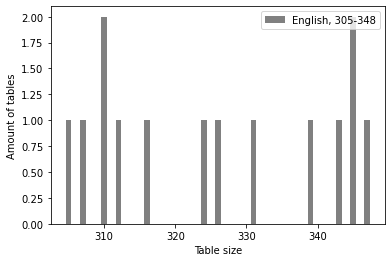

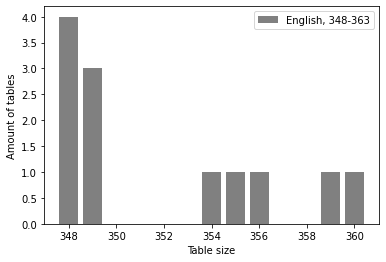

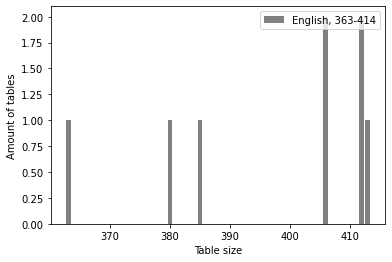

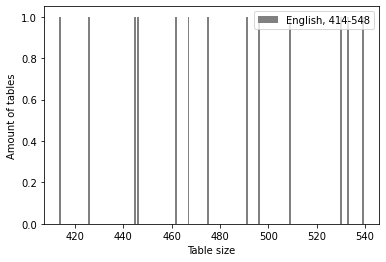

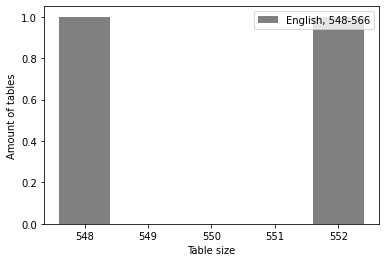

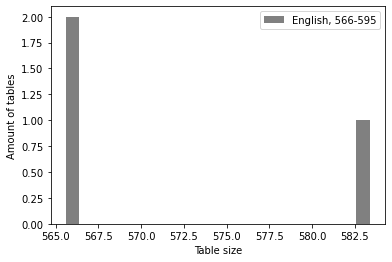

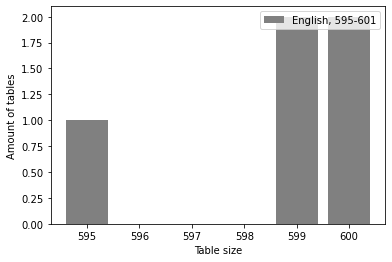

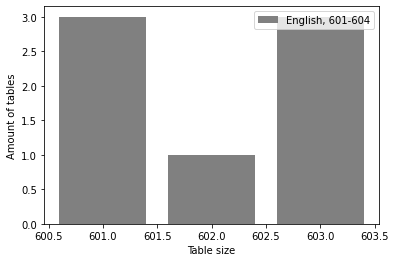

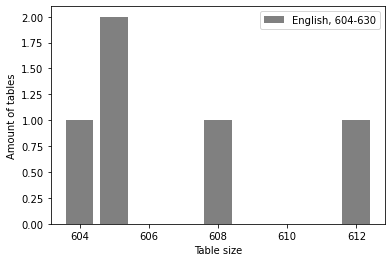

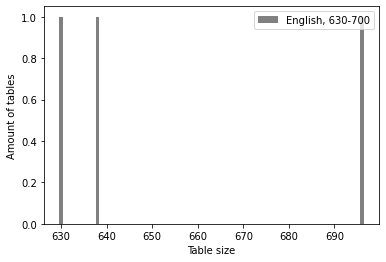

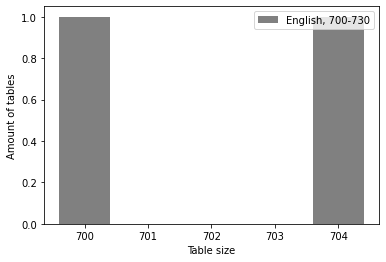

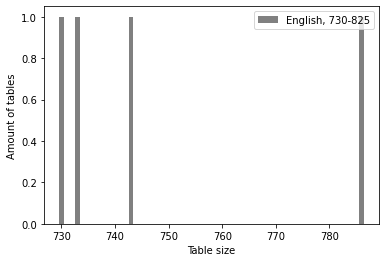

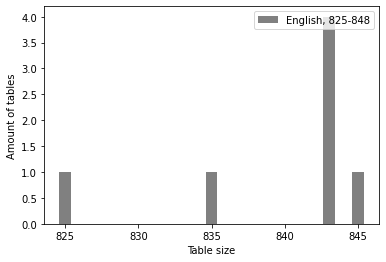

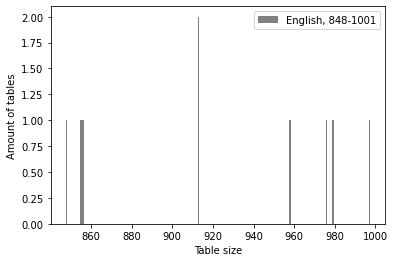

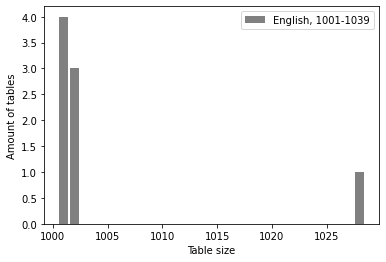

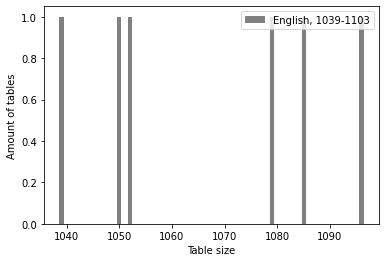

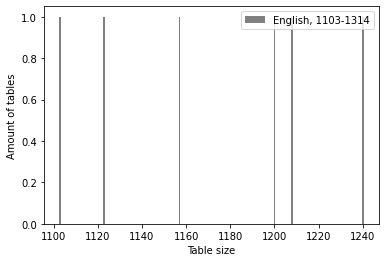

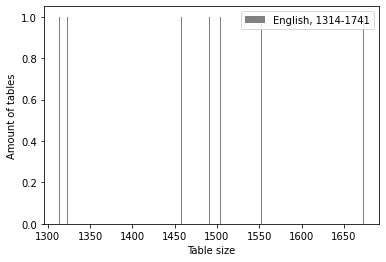

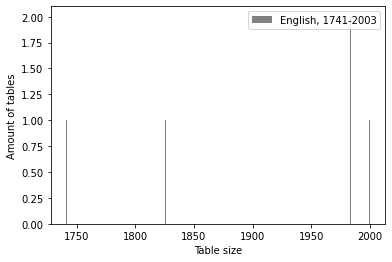

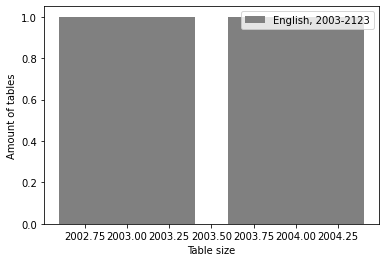

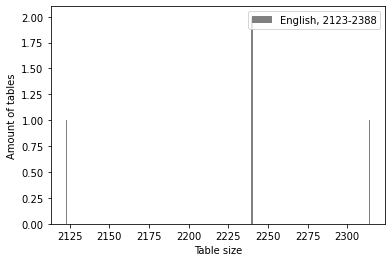

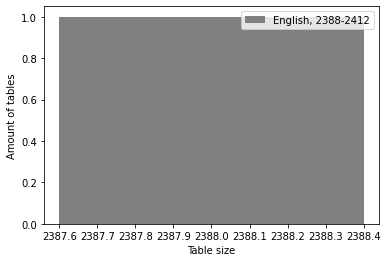

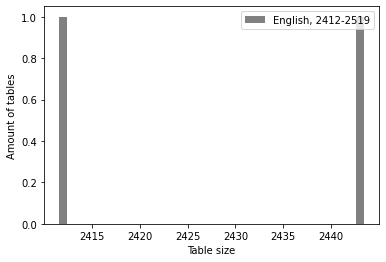

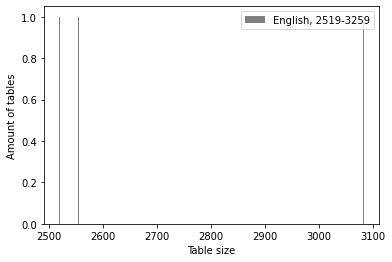

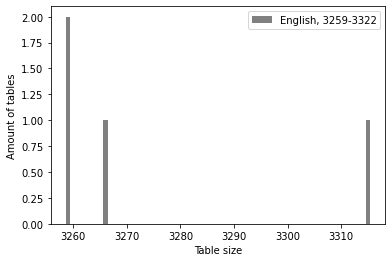

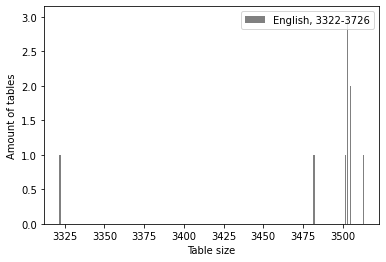

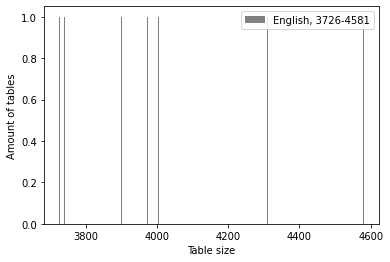

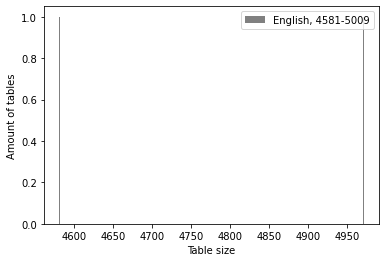

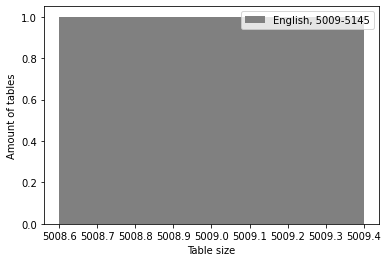

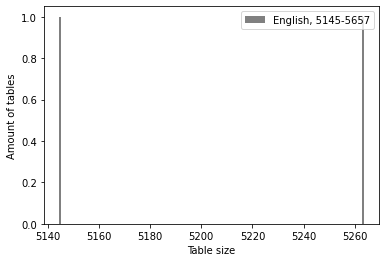

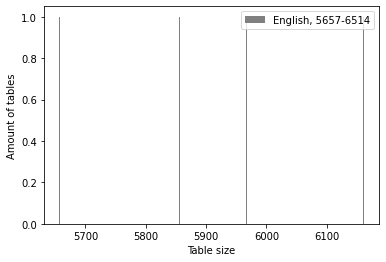

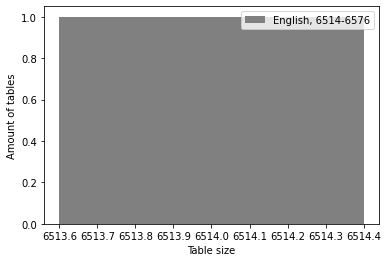

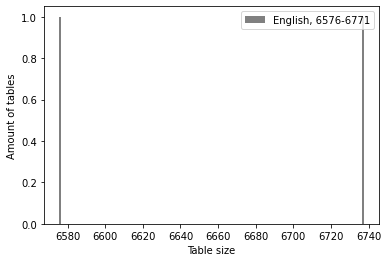

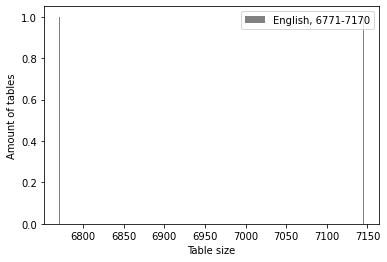

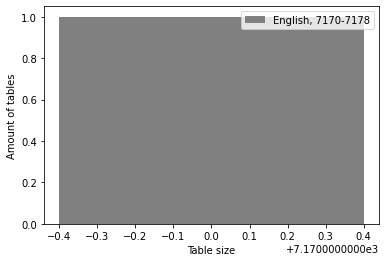

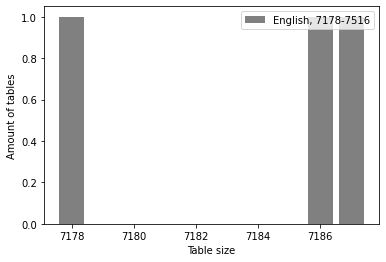

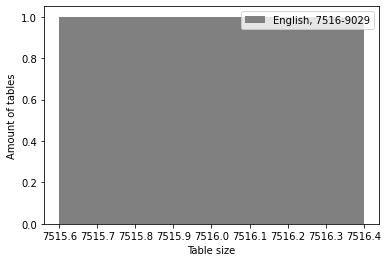

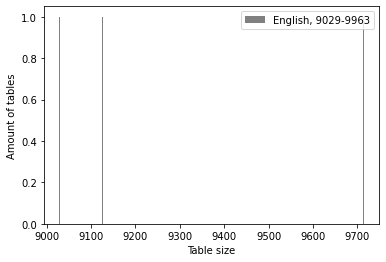

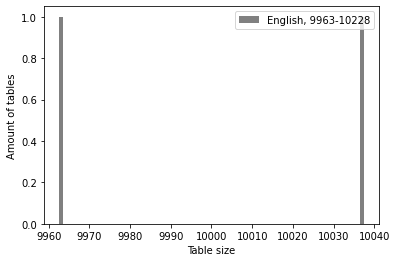

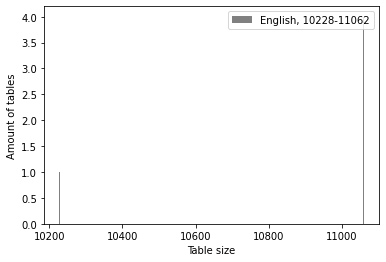

In [14]:
x_values = runew_unique_table_sizes.get_x()
y_values = runew_unique_table_sizes.get_y()

print(x_values[15])
print(y_values[15])

print(x_values[3])
print(y_values[3])


print(y_values[0])
print(len(x_values))
print(max(y_values))
print(x_values[y_values.index(max(y_values))])
print(max(x_values))

for left, right in boundaries:
    plt.bar(x_values[left:right], y_values[left:right], label=f'English, {x_values[left]}-{x_values[right]}', color="grey", width=0.8)
    plt.legend(loc='upper right')
    plt.xlabel("Table size")
    plt.ylabel("Amount of tables")
    plt.show()

### Распространенные значения

In [102]:
connector = en_spider
for _triple in connector.triples:
    db, table, column = _triple
    values = connector.get_values(db, table, column)
    unique_values = set(values)
    if len(unique_values) == 15:
        print(unique_values)

{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{"36594 O'Keefe Lock\nNew Cali, RI 42319", '0258 Kessler Mountains Suite 688\nMooreside, ME 41586-5022', '69482 Renner Ville Suite 653\nLangworthborough, OH 95195', '92594 Marvin Trafficway\nPourosfurt, IA 98649', '69275 Mose Drive\nWilkinsonstad, CO 79055-7622', '11784 Stehr Road\nPort Isaac, NV 61159', '145 Alice Corners\nWillmsport, NV 36680', '7181 Wuckert Port Apt. 571\nLake Zariaburgh, IL 98085', '4062 Mante Place\nWest Lindsey, DE 76199-8015', '8207 Morissette Lakes\nEast Rheaview, ID 47493', '0292 Mitchel Pike\nPort Abefurt, IA 84402-4249', '28481 Crist Circle\nEast Burdettestad, IA 21232', '99666 Julie Junction\nMarvinburgh, OH 16085-1623', '521 Molly Harbors Apt. 567\nReingerland, HI 97099-1005', '195 Mara Rue\nJenkinsmouth, OK 22345'}
{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{'Vito', 'Yolanda', 'Katelynn', 'Archibald', 'Maximus', 'Zakary', 'Adrienne', 'M

{'63', '26', '96', '37', '64', '75', '98', '60', '28', '66', '90', '86', '38', '9', '36'}
{'Karlee Batz', 'Justyn Lebsack', 'Neil Blick', 'Macy Mayer DDS', 'Berniece Weimann', 'Dr. Jaydon Renner', 'Lupe Deckow', 'Dewitt Walter', 'Kenyatta Kuhn', 'Vilma Schinner', 'Prof. Michelle Maggio Jr.', 'Dr. Kris Deckow', 'Miss Kaci Lebsack', 'Miss Joyce Cremin', 'Dedrick Ebert'}
{'96', '80', '13', '16', '57', '8', '48', '40', '43', '74', '60', '95', '38', '17', '3'}
{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{'159', '847', '349', '817', '388', '869', '229', '974', '833', '331', '557', '505', '782', '975', '613'}
{'clementina29', 'adam.rippin', 'jmckenzie', 'medhurst.alvah', 'heidenreich.ara', 'fiona77', 'wlehner', 'nyundt', 'qking', 'marty.bergnaum', 'nellie.mosciski', 'antonetta19', 'ekshlerin', 'dschaefer', 'al75'}
{'2c196efe8aee23a1b9a7e752fe63029c5879af6f', 'e96c0bcbbbb14747747a56ff4c17354f343a5b4f', '6b9979a83b4a9e03ead034c8de47f1b013a3d3af', '6d587cec8

{'10', '2', '13', '4', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{'31', '63', '69', '4', '16', '82', '91', '19', '5', '21', '76', '87', '17', '41', '79'}
{'Dr. Haylie Hilll III', 'Vincenza Price', 'Oma Smith', 'Esteban Senger', 'Tyrique Durgan II', 'Jayme Marquardt', 'Mr. Raul Prosacco', 'Malcolm Farrell', 'Monty Sauer III', 'Elva Boehm', 'Mackenzie Hettinger V', 'Jeff McCullough MD', 'Kyleigh Schuster', 'Sabryna Moore PhD', 'Bridgette Nitzsche PhD'}
{'24', '120', '107', '669', '373', '605', '629', '791', '849', '879', '445', '586', '954', '748', '108'}
{'824 Kiehn Vista', '322 Johnston Parkway Suite 422', '5384 Sipes Land Apt. 344', '7713 Bode Burgs Apt. 113', '85456 Annie Lodge Suite 449', '91002 Melvina Haven', '76714 Verla Radial Apt. 306', '2580 Yundt Plains', '3927 Spinka Loaf Suite 347', '129 Chasity Brook', '830 Jayne Points Suite 290', '54591 Bernard Ridges Suite 864', '04164 Raul Stream', '5983 Fleta Throughway', '72659 Frank Locks'}
{'10', '58', '23', '37', 


Problem with double in batting (db = baseball_1). Request: SELECT "double" FROM "batting"
{'10', '2', '4', '16', '13', '0', '8', '5', '12', '11', '9', '1', '6', '7', '3'}
{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{'Kolob Arch', 'Jiangzhou Arch', 'Sipapu Natural Bridge', 'Morning Glory Natural Bridge', 'Xian Ren Qiao (Fairy Bridge)', 'Landscape Arch', 'Stevens Arch', 'Hazarchishma Natural Bridge', 'Aloba Arch', 'Rainbow Bridge', 'Gaotun Natural Bridge', "Shipton's Arch", 'Snake Bridge', 'Wrather Arch', 'Outlaw Arch'}
{'1993', '1996', '1990', '1997', '2003', '1991', '2004', '1995', '2000', '1994', '1992', '1999', '2002', '1998', '2001'}
{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{'Alberto', 'Violet', 'Parker', 'Hadley', 'Savannah', 'George', 'Samson', 'Devan', 'Beulah', 'Jeramie', 'Mabelle', 'Leilani', 'Hershel', 'Chaz', 'Conrad'}
{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3

{'10', '2', '23', '24', '4', '13', '15', '14', '25', '12', '1', '17', '20', '7', '3'}
{'2014-12-25 17:22:44', '2005-09-30 00:10:02', '2008-04-21 20:42:25', '1982-09-27 14:52:15', '1974-05-08 00:00:46', '1985-11-05 17:59:34', '1986-12-14 14:18:59', '2015-04-03 09:36:19', '1999-04-17 14:19:32', '1976-09-15 19:24:17', '1983-09-26 09:32:56', '2017-07-02 17:39:09', '1996-07-27 03:30:40', '1973-11-05 21:48:53', '1996-05-31 06:51:58'}
{'80', '189', '69', '34', '37', '8', '93', '19', '117', '61', '55', '83', '114', '124', '79'}
{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{'1977-08-13 02:18:47', '1979-04-27 06:03:59', '2001-11-28 15:06:25', '2002-09-13 03:04:56', '1990-12-02 09:03:38', '1985-10-08 13:13:39', '1977-08-17 13:13:30', '1997-12-30 05:05:40', '1981-01-28 08:07:03', '1983-11-01 17:57:27', '2004-01-18 20:37:50', '1988-09-16 19:02:51', '1982-06-06 17:19:00', '2000-04-0

{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{'1993-02-19 16:31:12', '1979-07-04 08:54:23', '2003-08-29 03:32:52', '2000-06-06 01:03:46', '2014-01-28 05:11:34', '2002-07-26 15:50:28', '2004-01-23 11:57:08', '1999-05-29 00:02:46', '1979-08-23 08:22:34', '1978-09-13 16:23:29', '1986-11-30 07:56:35', '1997-03-09 03:42:19', '2001-06-18 06:35:49', '1999-03-03 12:25:58', '1981-08-06 14:56:55'}
{'1990-01-19 19:57:14', '1995-09-12 13:13:48', '1980-02-24 15:23:44', '1976-10-04 22:13:27', '1977-12-01 02:18:53', '1979-12-08 10:38:07', '1979-01-06 05:05:30', '1987-10-29 15:35:50', '1991-09-25 10:38:24', '1986-05-23 07:17:59', '1994-03-13 01:52:45', '1977-01-27 07:14:11', '1971-08-28 11:20:56', '1986-05-18 01:54:56', '1999-06-01 18:41:00'}
{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{'66.4203', '610.7004', '4515947.7015', '330.6339', '76977808.306', '608413.3291', '0', '4094.542', '38675408.6017', '281.2446', '2001349.459', 

{'Trailers', 'Commentaries', 'Trailers,Behind the Scenes', 'Behind the Scenes', 'Commentaries,Deleted Scenes,Behind the Scenes', 'Trailers,Commentaries,Behind the Scenes', 'Trailers,Commentaries', 'Commentaries,Deleted Scenes', 'Trailers,Commentaries,Deleted Scenes,Behind the Scenes', 'Commentaries,Behind the Scenes', 'Trailers,Deleted Scenes,Behind the Scenes', 'Trailers,Deleted Scenes', 'Deleted Scenes,Behind the Scenes', 'Trailers,Commentaries,Deleted Scenes', 'Deleted Scenes'}
{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{'1996-09-16 22:04:27', '2016-05-24 09:57:45', '1993-08-04 10:49:04', '1978-05-15 10:53:37', '2000-08-07 06:59:14', '1994-02-14 02:27:13', '1986-11-26 04:12:18', '1990-05-25 23:01:51', '1981-08-23 05:40:38', '2003-12-25 16:13:19', '2017-09-14 15:49:23', '1991-06-21 23:52:10', '1976-06-10 20:25:38', '1986-12-31 10:05:32', '2016-05-06 16:53:39'}
{'1997-11-07 20:22:05', '1984-02-01 19:54:54', '2001-11-09 04:37:33', '1973-02-24 02:5

{'10', '2', '4', '13', '15', '8', '5', '14', '12', '11', '9', '1', '6', '7', '3'}
{'gussie00', 'amelie53', 'lynn.haley', 'larson.vesta', 'ycremin', 'jacklyn.schmitt', 'joanne.deckow', 'faye30', "roger.o'conner", 'dickinson.lenora', 'glenna.simonis', 'tremblay.raheem', 'heller.harley', 'johanna.fisher', 'dickens.elta'}
{'da383455a05a824606c54e99f671c4d6a2ddae26', '90db8f51449e6c39e2a01f0b649d5a92fe76bbbb', '1fb26eea854962d41512827bf90a5b7ce4b359d8', 'e72b5a2d50b39a8760764a5f7a9d68ca2f076877', 'f6977378f409f5d2d230016a6678a582e14f43b0', '95f489fc0921bbb3e7d661a550ae208b88d9b11a', '3d478d7056d6417966f6b1676f6ec81b3094f44f', '20241478f890508ac47870cfba472e1db04a71ca', '11af7569a5c1e8b455add5755e18131be2ac8636', '6aa66440864ff8143fe7dee5940a6af3460bad07', '27cca8f94136f0e8971b5ca555a21ff756871b27', '9bc25a040d5647ced5ec32e1a455e90fafc10bcb', '75f7b5ed8e70e86467155e003ccda6fce1011c29', 'a0fe5434a5f4c218e37b0082f2408b357feb0fa6', '3f6affa583bfdf7fac6faeb2ca418431909d4b39'}
{'10', '2', '4', '1

{'885', '858', '740', '867', '655', '603', '661', '650', '579', '759', '868', '368', '333', '417', '861'}
{'Fossil Fun Games', 'African Animals', 'The Barnstormer', 'Coral Reefs', 'The Boneyard', 'Astro Orbiter', 'Castle', 'Shark World', 'Space Spin', 'Butterflies', 'African Adventure', 'Soak Station', 'American Adventure', 'Film Festival', 'UK Gallery'}
{'3374 Sarina Manor', '5536 Betsy Street Apt. 646', '2485 Mueller Squares Suite 537', '254 Ottilie Junction', '14034 Kohler Drive', '0692 Georgiana Pass', '88271 Barrows Union Suite 203', '4510 Schuster Stream Apt. 613', '53815 Sawayn Tunnel Apt. 297', '4411 Sabrina Radial Suite 582', '959 Feest Glen Suite 523', '101 Paucek Crescent', '660 Shea Crescent', '4908 Reinger Vista', '770 Edd Lane Apt. 098'}
{'', '38014975.47848', '250548014.90329', '2914989.571', '43.729525', '5390.432113', '245.067720121', '2374.7971074', '9393.86291219', '1381255.81865', '5526556.6412', '48525.4530675', '289775.7331715', '17012.682586009', '766712918.96763

In [104]:
connector = ru_spider_new
for _triple in connector.triples:
    db, table, column = _triple
    values = connector.get_values(db, table, column)
    unique_values = set(values)
    if len(unique_values) == 7:
        print(unique_values)

{'2', '4', '5', '1', '6', '7', '3'}
{'базы данных', 'библиотека', 'космос', 'сказки', 'Наука', 'домен', 'физика'}
{'conf.com', 'pvldb.ru', 'murzilka.com', 'library.ru', 'bd.com', 'space.com', 'arXiv.org'}
{'2', '4', '5', '1', '6', '7', '3'}
{'базы данных', 'космос', 'конференция', 'мурзилка', 'PVLDB', 'библиотека', 'arXiv.org'}
{'2', '8', '5', '1', '6', '7', '3'}
{'2', '4', '5', '1', '6', '7', '3'}
{'AsstProf', 'Магистр', 'Professor', 'AssocProf', 'Бакалавр', 'Студент', 'Instructor'}
{'2', '4', '5', '1', '6', '7', '3'}
{'CH-53E Super Stallion', 'Bell 206B3 JetRanger', 'Mil Mi-26', 'Ил-114-300', 'Эйрбас', 'Robinson R-22', 'CH-47D Chinook'}
{'May 8–9', 'March 26–27', 'August 7–8', 'June 19–20', 'Cancelled', 'June 5–6', 'April 17–18'}
{'2', '13', '14', '11', '1', '6', '9'}
{'2', '4', '5', '1', '6', '7', '3'}
{'4', '8', '5', '7', '6', '9', '3'}
{'10', '2', '4', '5', '1', '9', '3'}
{'', 'FL', 'AL', 'PL', 'AA', 'NL', 'UA'}
{'', 'FL', 'AL', 'PL', 'AA', 'NL', 'UA'}
{'2', '4', '0', '5', '1', '6

{'40.0', '100.0', '60.0', '18.77', '45.0', '30.0', '49.0'}
{'2', '4', '841', '5', '1', '6', '3'}
{'550', '520', '100', '600', '540', '50', '510'}
{'2', '4', '5', '1', '6', '9', '3'}
{'2008', '2013', '2010', '2007', '2009', '2011', '2012'}
{'9.687', '9.65', '8.987', '9.762', '9.725', '9.7', '9.412'}
{'9.325', '9.75', '9.675', '9.712', '9.525', '9.737', '9.625'}
{'9.75', '9.487', '9.3', '9.712', '9.475', '9.512', '9.625'}
{'9.562', '9.5', '9.587', '9.762', '9.725', '9.787', '9.625'}
{'21.0', '18.0', '19.0', '22.0', '23.0', '20.0', '24.0'}
{'2', '4', '5', '1', '6', '7', '3'}
{'Complete Walletectomy', 'Obtuse Pyloric Recombobulation', 'Obfuscated Dermogastrotomy', 'Follicular Demiectomy', 'Reversible Pancreomyoplasty', 'Folded Demiophtalmectomy', 'Reverse Rhinopodoplasty'}
{'1500.0', '25.0', '4899.0', '3750.0', '10000.0', '5600.0', '4500.0'}
{'2', '4', '5', '1', '6', '7', '3'}
{'151', '102', '103', '185', '121', '105', '101'}
{'2008-04-24 11:00', '2008-04-21 11:00', '2008-04-27 11:00', '20

{'305', '301', '303', '307', '308', '302', '309'}
{'151', '121', '171', '111', '161', '141', '181'}
{'305', '301', '303', '307', '308', '302', '309'}
{'2010-04-07 11:44:34', '2010-04-09 11:44:34', '2010-04-06 11:44:34', '2010-04-17 11:44:34', '2010-04-09 11:25:35', '2010-04-08 11:25:35', '2010-04-05 11:44:34'}
{'1:54.40', '1:56.34', '1:57.26', '1:57.21', '1:56.77', '1:57.10', '1:56.44'}
{'Russia', 'Spain', 'England', 'Hungary', 'Azerbaijan', 'Уругвай', 'France'}
{'10', '2', '4', '8', '11', '1', '3'}
{'2', '4', '8', '5', '1', '7', '3'}
{'57', '45', '49', '47', '46', '50', '48'}
{'2', '4', '5', '1', '6', '7', '3'}
{'2008', '2010', '2005', '2007', '2006', '2009', '2004'}
{'Santa Claus', 'Summer', 'День святого Валентина', 'Christmas stocking', 'Christmas Tree', 'Spring', 'Santa Claus and Rudolph the Red-Nosed Reindeer'}
{'10', '2', '13', '15', '5', '9', '3'}
{'Александр Невский', 'Ben Jones', 'Michael Chang', 'Николай Лебедев', 'Федор Бондарчук', 'Brandon Vietti', 'Денис Устинов'}
{'4', '